In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import warnings
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import spacy
from spacy import displacy
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_excel('../data/cleaned_labeled_dataset_2.xlsx')
df.head()

,text,label,clean_text
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,anies tepuk tangan meriah rektor mewajibkan ma...
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,"memang bener memang, pendukung 01 goblok, pend..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,anies bersikap kritis kinerja prabowo dianggap...
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,anies baswedan harap asn tni polri pegang sump...


In [115]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

text          0
label         0
clean_text    0
dtype: int64

In [67]:
import string
import numpy as np
import emoji


def get_character_features(df):
    # Jumlah karakter
    df['char_count'] = df['text'].apply(len)

    # Jumlah kata
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))

    # Rata-rata panjang kata
    df['avg_word_length'] = df['char_count'] / df['word_count']

    # Std dev panjang kata
    df['std_word_length'] = df['text'].apply(lambda x: np.std([len(word) for word in x.split()]))

    # Maksimum panjang kata
    df['max_word_length'] = df['text'].apply(lambda x: max([len(word) for word in x.split()]))

    # Minimum panjang kata
    df['min_word_length'] = df['text'].apply(lambda x: min([len(word) for word in x.split()]))

    # Jumlah karakter tanpa spasi
    df['char_count_no_space'] = df['text'].apply(lambda x: len(x.replace(" ", "")))

    # jumlah tanda baca
    df['punctuation_count'] = df['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))

    # Jumlah huruf kapital
    df['upper_case_word_count'] = df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

    # Jumlah kata unik
    df['unique_word_count'] = df['text'].apply(lambda x: len(set(w for w in x.split())))

    # Jumlah stop words bahasa indonesia
    with open('../data/combined_stop_words.txt', 'r') as f:
        stopwords = f.read().splitlines()

    df['stopword_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w in stopwords]))

    # Jumlah kata yang mengandung angka
    df['numeric_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.isnumeric()]))

    # jumlah hashtag
    df['hashtag_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.startswith('#')]))

    # jumlah mention
    df['mention_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.startswith('@')]))

    # jumlah url http/https
    df['url_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.startswith('http')]))

    # jumlah retweet (RT)
    df['retweet_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.lower() == 'rt']))

    # jumlah RE: (reply)
    df['reply_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.lower() == 're:']))

    # jumlah emoji
    df['emoji_count'] = df['text'].apply(lambda x: emoji.emoji_count(x))

    # jumlah kata yang mengandung huruf ganda
    df['repeated_letter_count'] = df['text'].apply(lambda x: len([w for w in x.split() if bool(re.search(r'(.)\1', w))]))

    return df

In [122]:
get_character_features(df)

,text,label,clean_text,char_count,word_count,avg_word_length,std_word_length,max_word_length,min_word_length,char_count_no_space,...,unique_word_count,stopword_count,numeric_count,hashtag_count,mention_count,url_count,retweet_count,reply_count,emoji_count,repeated_letter_count
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...,184,20,9.200000,5.127134,22,2,165,...,19,5,0,4,0,0,0,0,0,0
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,anies tepuk tangan meriah rektor mewajibkan ma...,184,22,8.363636,5.297161,23,2,163,...,21,4,0,1,0,1,1,0,0,3
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,"memang bener memang, pendukung 01 goblok, pend...",254,35,7.257143,7.145714,45,2,220,...,30,7,2,0,1,0,0,0,0,2
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,anies bersikap kritis kinerja prabowo dianggap...,309,40,7.725000,6.651128,45,2,270,...,35,11,0,0,1,0,1,0,0,4
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,anies baswedan harap asn tni polri pegang sump...,101,13,7.769231,5.020667,23,3,89,...,13,2,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik,"ngeliat debat kemaren prabowo kicep, kekira ke...",168,22,7.636364,8.651780,45,1,147,...,22,4,0,0,1,0,1,0,0,1
4987,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik,masyarakat prabowo-gibran memiliki visi sejala...,156,15,10.400000,5.619806,23,4,142,...,15,4,0,1,0,1,0,0,0,1
4988,imo both are irrational but yg satu jauh lebih...,Ekonomi,imo both are irrational but irrational tbh. bu...,219,36,6.083333,2.480790,12,2,184,...,33,11,0,0,0,0,0,0,0,3
4989,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan,"look at that ganjar, berkecimpung lgislatif, e...",246,31,7.935484,7.429166,45,2,216,...,29,6,0,0,1,0,0,0,0,3


In [128]:
# total kolom df
print(df.columns)
print(len(df.columns))

Index(['text', 'label', 'clean_text', 'char_count', 'word_count',
       'avg_word_length', 'std_word_length', 'max_word_length',
       'min_word_length', 'char_count_no_space', 'punctuation_count',
       'upper_case_word_count', 'unique_word_count', 'stopword_count',
       'numeric_count', 'hashtag_count', 'mention_count', 'url_count',
       'retweet_count', 'reply_count', 'emoji_count', 'repeated_letter_count'],
      dtype='object')
22


In [78]:
# simpan ke file
df.to_excel('../output/feature_extracted_dataset_1.xlsx', index=False)

In [125]:
# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

X = df.drop(columns=['label', 'clean_text', 'text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [126]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

balanced_accuracy_score(y_test, y_pred)


0.39306308998653083

In [127]:
# seimbangkan dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# random forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9181212774172303

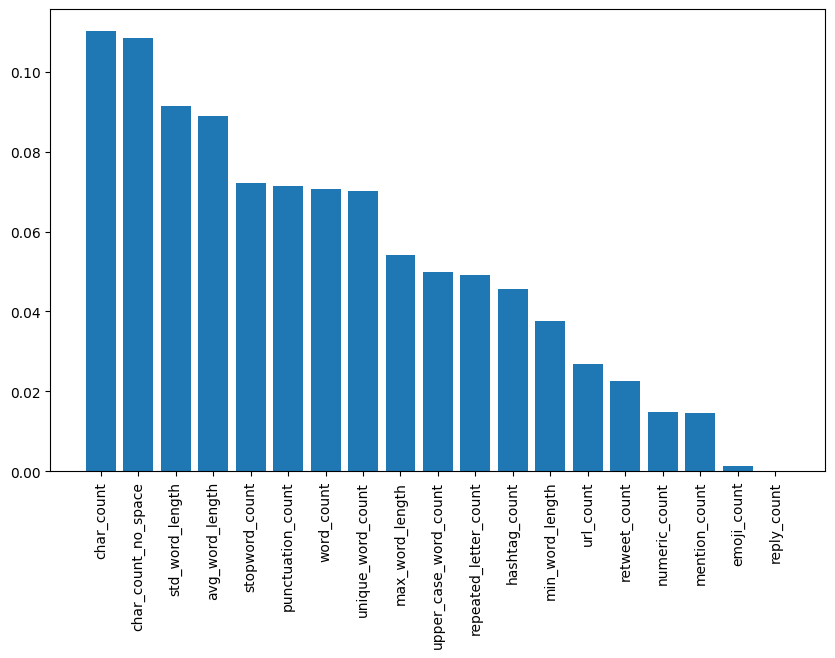

In [129]:
# feature importance
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


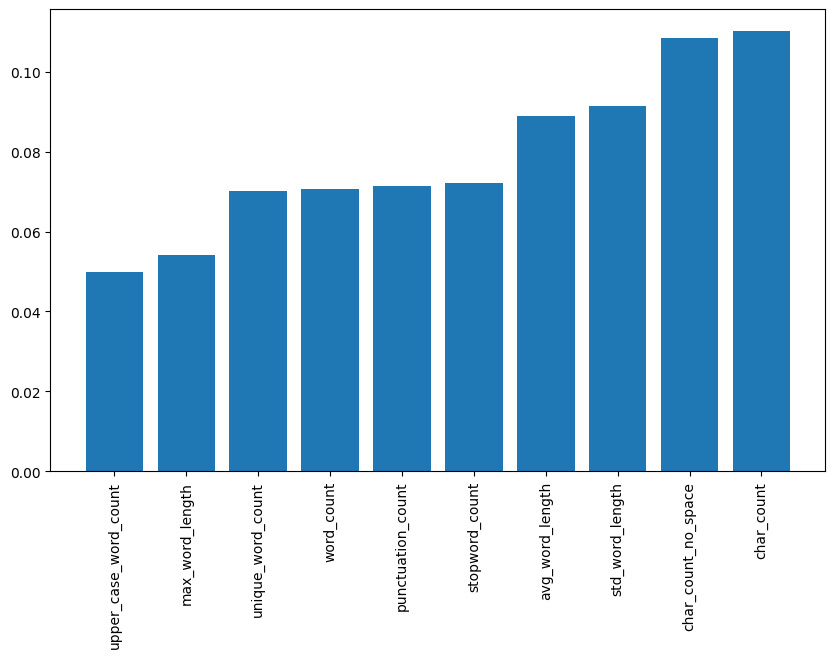

In [132]:
# plot 10 fitur terbawah
plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices][-10:])
plt.xticks(range(10), X.columns[indices][-10:], rotation=90)
plt.show()


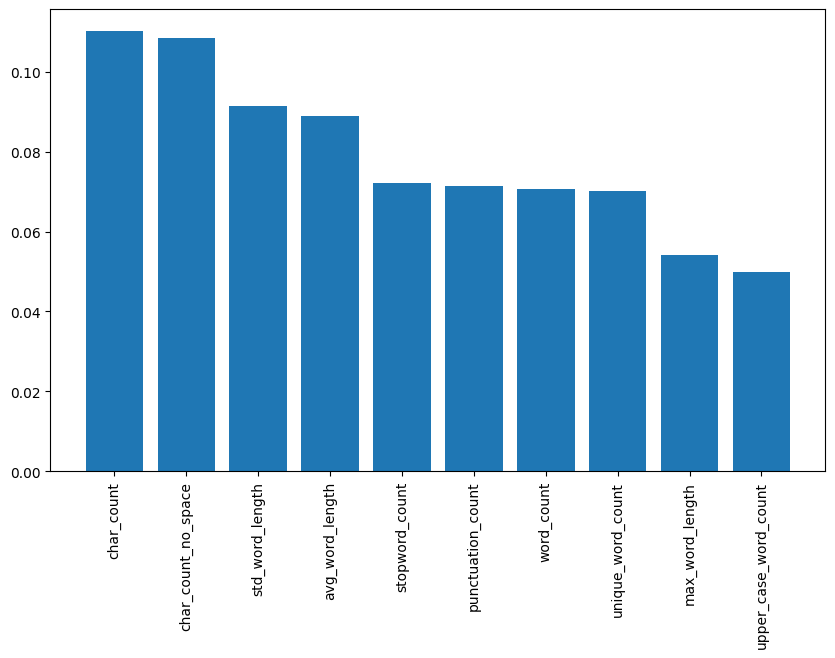

In [133]:
# 10 fitur teratas
importances = clf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), X.columns[indices][:10], rotation=90)
plt.show()

In [136]:
unlabeled = pd.read_excel('../data/cleaned_unlabeled_dataset_2.xlsx')
unlabeled.rename(columns={'Text': 'text'}, inplace=True)
unlabeled

,IDText,text,clean_text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,org2 pro-demokrasi negara kesempatan ngelawan ...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,prabowo ditanya hutang negeri menjawab hutang ...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,kiki_daliyo ganjar pranowo sosok mengagunhkan ...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,prabowo gibran melakukan kesejahteraan rakyat
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,nyambung junjungan elu aomkmkmkmk ngomongin et...
...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...","bikin bangga deh, ganjar-mahfud alokasikan bel..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,jokowi pilpres 2024 berbesar hati merangkul pr...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,sbaiknya si gemot nga ikutan debat deh..nga ma...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,kebiasaan merembuk bermusyawarah gaya kepemimp...


# INFERENCE

In [137]:
unlabeled = get_character_features(unlabeled)


In [138]:
unlabeled

,IDText,text,clean_text,char_count,word_count,avg_word_length,std_word_length,max_word_length,min_word_length,char_count_no_space,...,unique_word_count,stopword_count,numeric_count,hashtag_count,mention_count,url_count,retweet_count,reply_count,emoji_count,repeated_letter_count
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,org2 pro-demokrasi negara kesempatan ngelawan ...,281,46,6.108696,2.696441,13,1,239,...,34,12,0,0,0,0,0,0,0,0
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,prabowo ditanya hutang negeri menjawab hutang ...,586,85,6.894118,2.291431,13,2,505,...,64,28,1,0,0,0,0,0,0,4
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,kiki_daliyo ganjar pranowo sosok mengagunhkan ...,266,30,8.866667,5.173007,23,2,236,...,29,11,0,6,0,0,0,0,0,1
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,prabowo gibran melakukan kesejahteraan rakyat,80,11,7.272727,2.837179,13,3,70,...,11,5,0,0,1,0,0,0,0,1
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,nyambung junjungan elu aomkmkmkmk ngomongin et...,320,46,6.956522,3.057112,16,2,276,...,41,9,0,0,3,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...","bikin bangga deh, ganjar-mahfud alokasikan bel...",235,27,8.703704,5.104935,23,3,211,...,26,7,0,3,1,1,0,0,0,4
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,jokowi pilpres 2024 berbesar hati merangkul pr...,280,41,6.829268,2.934745,15,3,240,...,36,10,1,0,0,0,0,0,0,1
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,sbaiknya si gemot nga ikutan debat deh..nga ma...,303,42,7.214286,3.322431,16,2,262,...,42,7,0,0,1,0,0,0,0,5
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,kebiasaan merembuk bermusyawarah gaya kepemimp...,217,26,8.346154,4.151709,23,3,192,...,26,7,0,1,0,1,0,0,0,3


In [140]:
# predict
X_unlabeled = unlabeled.drop(columns=['text', 'clean_text', 'IDText'])
y_unlabeled = clf.predict(X_unlabeled)

unlabeled['label'] = y_unlabeled
unlabeled

,IDText,text,clean_text,char_count,word_count,avg_word_length,std_word_length,max_word_length,min_word_length,char_count_no_space,...,stopword_count,numeric_count,hashtag_count,mention_count,url_count,retweet_count,reply_count,emoji_count,repeated_letter_count,label
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,org2 pro-demokrasi negara kesempatan ngelawan ...,281,46,6.108696,2.696441,13,1,239,...,12,0,0,0,0,0,0,0,0,Politik
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,prabowo ditanya hutang negeri menjawab hutang ...,586,85,6.894118,2.291431,13,2,505,...,28,1,0,0,0,0,0,0,4,Sosial Budaya
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,kiki_daliyo ganjar pranowo sosok mengagunhkan ...,266,30,8.866667,5.173007,23,2,236,...,11,0,6,0,0,0,0,0,1,Politik
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,prabowo gibran melakukan kesejahteraan rakyat,80,11,7.272727,2.837179,13,3,70,...,5,0,0,1,0,0,0,0,1,Sumber Daya Alam
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,nyambung junjungan elu aomkmkmkmk ngomongin et...,320,46,6.956522,3.057112,16,2,276,...,9,0,0,3,0,0,0,0,2,Geografi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...","bikin bangga deh, ganjar-mahfud alokasikan bel...",235,27,8.703704,5.104935,23,3,211,...,7,0,3,1,1,0,0,0,4,Politik
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,jokowi pilpres 2024 berbesar hati merangkul pr...,280,41,6.829268,2.934745,15,3,240,...,10,1,0,0,0,0,0,0,1,Politik
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,sbaiknya si gemot nga ikutan debat deh..nga ma...,303,42,7.214286,3.322431,16,2,262,...,7,0,0,1,0,0,0,0,5,Politik
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,kebiasaan merembuk bermusyawarah gaya kepemimp...,217,26,8.346154,4.151709,23,3,192,...,7,0,1,0,1,0,0,0,3,Politik


In [141]:

# hapus kolom fitur
unlabeled.drop(columns=X_unlabeled.columns, inplace=True)

unlabeled.drop(columns='clean_text', inplace=True)
# simpan ke file
unlabeled.to_excel('../output/predicted_unlabeled_dataset.xlsx', index=False)


In [142]:
unlabeled

,IDText,text,label
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,Politik
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,Sosial Budaya
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,Politik
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,Sumber Daya Alam
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,Geografi
...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...",Politik
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,Politik
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,Politik
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,Politik
